In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv

In [59]:
def show_image(image, title:str=None):
    import cv2 as cv
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    if title is not None:
        plt.title(title)
    plt.show()

In [60]:
img = cv.imread("stop_sign.jpg")
img.shape

(481, 421, 3)

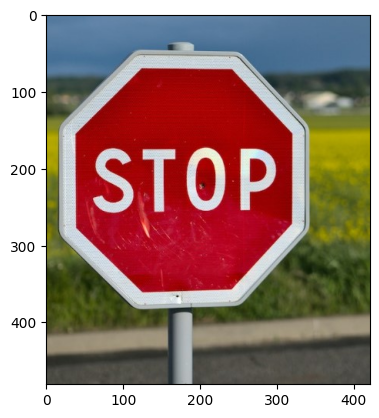

In [61]:
show_image(img)

In [5]:
# Create mask for gragcut
mask = np.zeros(img.shape[:2],np.uint8)

In [6]:
# Get position of rectangle for target in image
# Area of interest:
x = 20
y = 50
width = 320
height = 350
rect = (x,y,width,height)

In [7]:
# Background and foreground models
background_model = np.zeros((1,65),np.float64)
foreground_model = np.zeros((1,65),np.float64)

In [8]:
ITERATIONS = 5 # = epochs in ANN

In [9]:
modes = [cv.GC_INIT_WITH_RECT, cv.GC_INIT_WITH_MASK]

In [13]:
# Run grabcut
res = cv.grabCut(
    img = img,
    mask = mask,
    rect = rect,
    bgdModel = background_model,
    fgdModel = foreground_model,
    iterCount = ITERATIONS,
    mode = modes[0])

In [19]:
flagged_mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

In [23]:
masked_image = img*flagged_mask[:,:,np.newaxis]

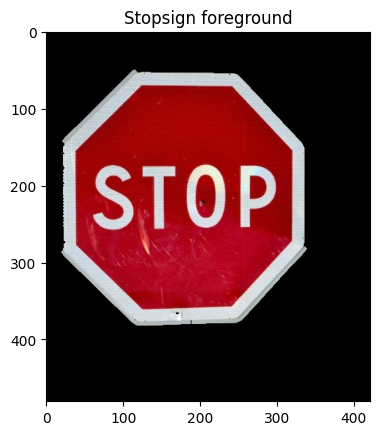

In [62]:
show_image(masked_image, "Stopsign foreground")

In [63]:
def get_fg(image_path:str,fg_x:int,fg_y:int,fg_width:int,fg_height:int, accuracy:int):
    import cv2 as cv
#    print(f"your OpenCV version is {cv.__version__}")
    import matplotlib.pyplot as plt
    image = cv.imread(image_path)
    if image is not None:
        i_mask = np.zeros(image.shape[:2],np.uint8)
        i_rect = (fg_x,fg_y,fg_width,fg_height)
        i_bg_model = np.zeros((1,65),np.float64)
        i_fg_model = np.zeros((1,65),np.float64)
        L_ITERATIONS = accuracy # = epochs in ANN
        i_modes = [cv.GC_INIT_WITH_RECT, cv.GC_INIT_WITH_MASK]
        cv.grabCut(
            img = image,
            mask = i_mask,
            rect = i_rect,
            bgdModel = i_bg_model,
            fgdModel = i_fg_model,
            iterCount = L_ITERATIONS,
            mode = i_modes[0])
        i_flagged_mask = np.where((i_mask==2)|(i_mask==0),0,1).astype('uint8')
        return image * i_flagged_mask[:,:,np.newaxis]
    else:
        raise ValueError("Image not found")

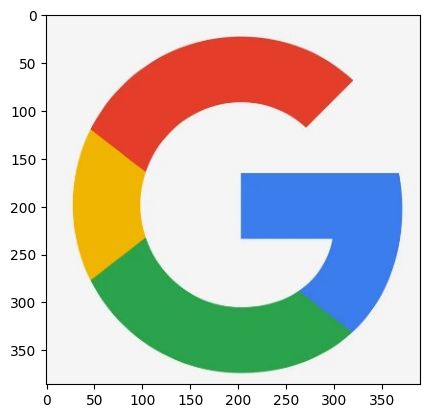

In [64]:
show_image(cv.imread("logo_g.jpeg"))

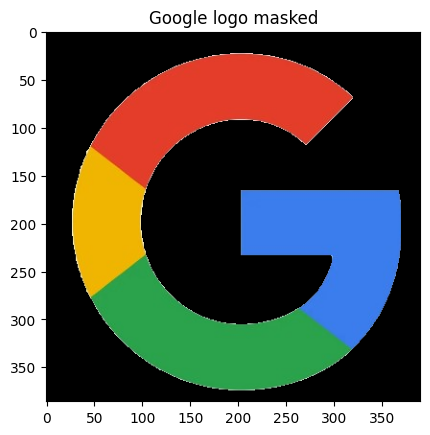

In [65]:
show_image(get_fg("logo_g.jpeg",20,20,350,360,5),"Google logo masked")

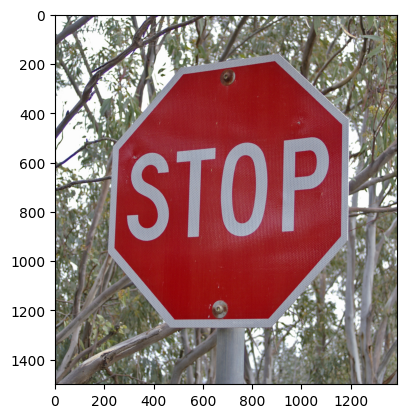

In [66]:
show_image(cv.imread("stop_sign_2.jpg"))

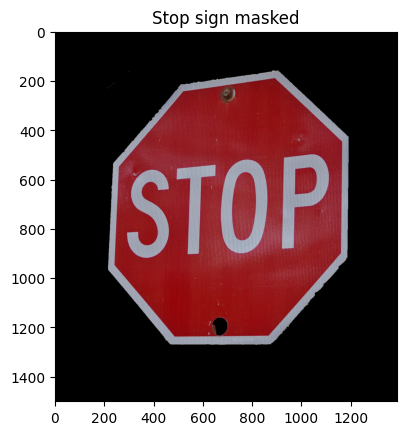

In [67]:
show_image(get_fg("stop_sign_2.jpg",210,160,1000,1150,5), "Stop sign masked")